In [1]:
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
import numpy as np
# Datenimport
dat = []
with open("lichtkurve.txt","r") as file:
    for lines in file:
        dat.append([float(lines.split()[0]),float(lines.split()[1])])

data = np.array(dat)
print(len(data[:,0]))

200


 The best solution found:                                                                           
 [1.01714644e-01 1.86719562e-01 6.69447370e-02 7.26852912e-04
 6.61137177e-01 1.14538891e-01 4.01743146e-01 5.50994696e-01
 1.96022811e-02 1.61248719e-01 9.83067989e-01 1.08262349e-01
 1.69872027e-01 7.44693980e-01]

 Objective function:
 182.92169463207074


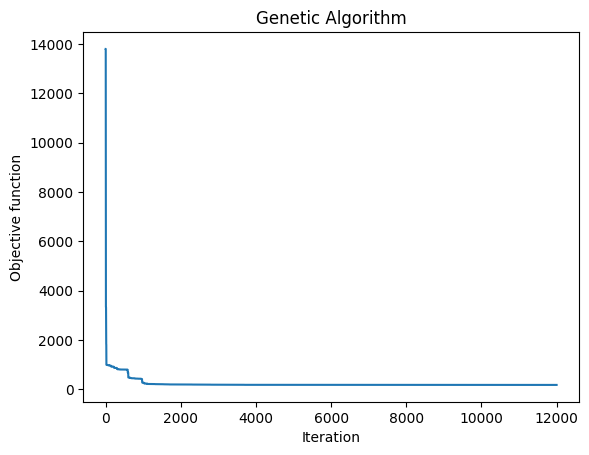

In [30]:
from copy import deepcopy
from scipy.optimize import minimize
# die ch^2 funktion
def fit_function2(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun)+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j])
    fun += a*data[:,0]+b
    return np.sum((fun-data[:,1])**2/25)

sin_numb =4
# boundary conditions
bs = np.zeros((2+3*sin_numb,2))
for i in range(bs.shape[0]):
    bs[i,:]=np.array([0,1])
algorithm_param = {'max_num_iteration': 12000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.04,\
                   'crossover_probability': 0.6,\
                   'parents_portion': 0.35,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model = ga(fit_function2,2+3*sin_numb,variable_type='real',variable_boundaries=bs,algorithm_parameters=algorithm_param)
model.run()

[1.01714644e-01 1.86719562e-01 6.69447370e-02 7.26852912e-04
 6.61137177e-01 1.14538891e-01 4.01743146e-01 5.50994696e-01
 1.96022811e-02 1.61248719e-01 9.83067989e-01 1.08262349e-01
 1.69872027e-01 7.44693980e-01]
182.92169463207074


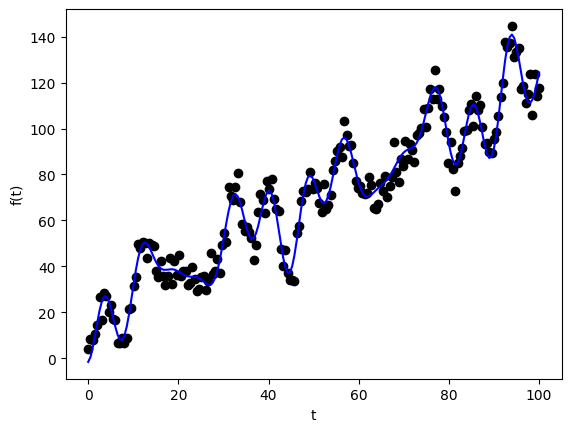

In [31]:
from copy import deepcopy
print(model.output_dict['variable'])
print(model.output_dict['function'])
# die angepasste funktion
def func(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j]))
    fun += a*data[:,0]+b
    return fun


import matplotlib.pyplot as plt


plt.figure()
ax = plt.axes()

ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.scatter(data[:,0],data[:,1],color="black")
ax.plot(data[:,0],func(model.output_dict['variable']),color='blue')
plt.show()



In [37]:
# die nächsten zwei zeilen generieren mir meine Latex tabellen
x = model.output_dict['variable']
a = x[0]*10
b= x[1]*100
amp = x[2::3]*100
per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
phi = x[4::3]*np.pi*2

In [38]:
print("&{:.3f}&{:.3f}&&&\\\\".format(a,b))
for i in range(1,5):
    print("{}&&&{:.3f}&{:.3f}&{:.3f}\\\\".format(i,amp[i-1],per[i-1],phi[i-1]))

&1.017&18.672&&&\\
1&&&6.694&0.538&4.154\\
2&&&11.454&20.388&3.462\\
3&&&1.960&8.484&6.177\\
4&&&10.826&8.911&4.679\\


In [2]:
# die zu fittenden Funktionen aus dem ersten Aufgabenteil
def fit1(x):
    r_sq = (x[0]-0.5)**2+(x[1]-0.5)**2
    return 1/(2+np.cos(9*np.pi*np.sqrt(r_sq))*np.exp(-r_sq/0.15))

def fit2(x):
    r1 = (x[0]-0.5)**2+(x[1]-0.5)**2
    r2 = (x[0]-0.6)**2+(x[1]-0.1)**2
    return 1/(0.8*np.exp(-r1/0.3**2)+0.879008*np.exp(-r2/(0.03)**2))

 The best solution found:                                                                           
 [0.49999929 0.50000118]

 Objective function:
 0.3333333334189801


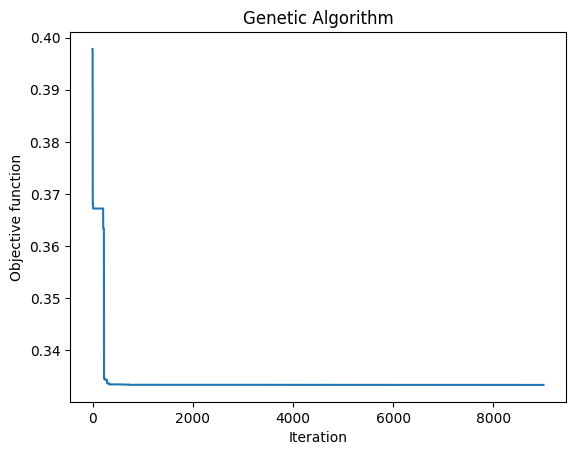

In [3]:
algorithm_param = {'max_num_iteration': 9000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
bounds = np.array([[-2,2],[-2,2]])
model = ga(fit1,2,variable_type='real',variable_boundaries=bounds,algorithm_parameters=algorithm_param)
model.run()
    